# Plotting aggregate variables

Pyam offers many great visualisation and analysis tools. In this notebook we highlight the `aggregate` and `stack_plot` methods of an `IamDataFrame`. 

In [1]:
import numpy as np
import pandas as pd

import pyam

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Aggregating sectors

Here we provide some sample data for the first part of this tutorial. This data is for a single model-scenario-region combination but provides multiple subsectors of CO$_2$ emissions. The emissions in the subsectors are both positive and negative and so provide a good test of the flexibility of our aggregation and plotting routines.

In [3]:
df = pyam.IamDataFrame(pd.DataFrame([
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|Oil', 'Mt CO2/yr', 2, 3.2, 2.0, 1.8],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|Gas', 'Mt CO2/yr', 1.3, 1.6, 1.0, 0.7],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Energy|BECCS', 'Mt CO2/yr', 0.0, 0.4, -0.4, 0.3],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Cars', 'Mt CO2/yr', 1.6, 3.8, 3.0, 2.5],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Tar', 'Mt CO2/yr', 0.3, 0.35, 0.35, 0.33],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Agg', 'Mt CO2/yr', 0.5, -0.1, -0.5, -0.7],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|LUC', 'Mt CO2/yr', -0.3, -0.6, -1.2, -1.0]
    ],
    columns=['model', 'scenario', 'region', 'variable', 'unit', 2005, 2010, 2015, 2020],
))
df.head()

,model,scenario,region,variable,unit,year,value
0,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2005,0.5
1,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2010,-0.1
2,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2015,-0.5
3,IMG,a_scen,World,Emissions|CO2|Agg,Mt CO2/yr,2020,-0.7
4,IMG,a_scen,World,Emissions|CO2|Cars,Mt CO2/yr,2005,1.6


Pyam's `stack_plot` method plots the stacks in the clearest way possible, even when some emissions are negative. The optional `total` keyword arguments also allows the user to include a total line on their plot.

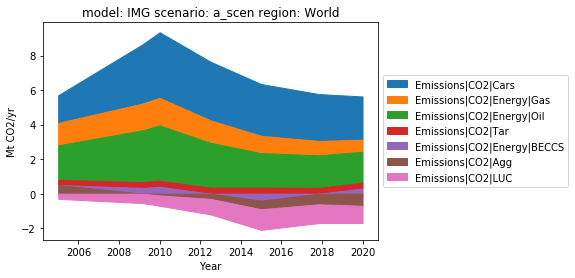

In [4]:
df.stack_plot();

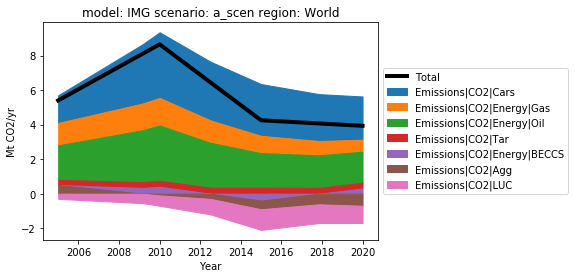

In [5]:
df.stack_plot(total=True);

The appearance of the stackplot can be simply controlled via ``kwargs``. The appearance of the total line is controlled by passing a dictionary to the `total_kwargs` keyword argument.

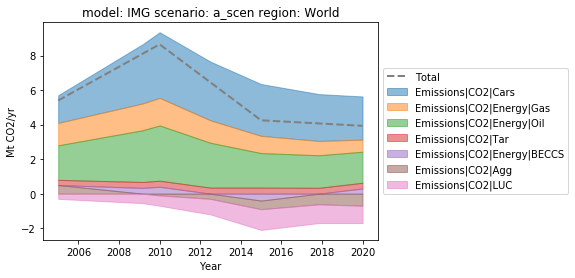

In [6]:
df.stack_plot(alpha=0.5, total={"color": "grey", "ls": "--", "lw": 2.0});

If the user wishes, they can firstly filter their data before plotting.

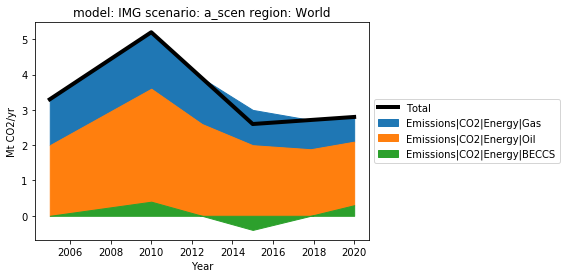

In [7]:
df.filter(variable="Emissions|CO2|Energy*").stack_plot(total=True);

Using `aggregate`, it is possible to create arbitrary sums of sub-sectors before plotting.

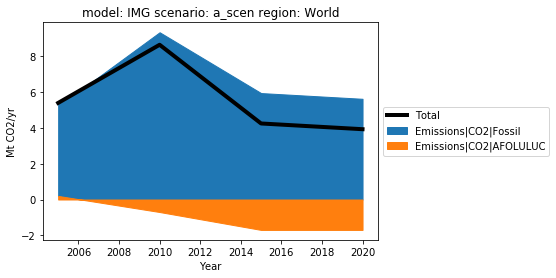

In [8]:
pdf = df.copy()
afoluluc_vars = ["Emissions|CO2|LUC", "Emissions|CO2|Agg"]
fossil_vars = list(set(pdf.variables()) - set(afoluluc_vars))
pdf.aggregate(
    "Emissions|CO2|AFOLULUC", 
    components=afoluluc_vars, 
    append=True
)
pdf.aggregate(
    "Emissions|CO2|Fossil", 
    components=fossil_vars, 
    append=True
)
pdf.filter(variable=[
    "Emissions|CO2|AFOLULUC",
    "Emissions|CO2|Fossil"
]).stack_plot(total=True);

## Aggregating regions

Here we provide some sample data for the second part of this tutorial. This data is for a single model-scenario combination with a few subsectors of CO$_2$ emissions. The emissions in the subsectors are both positive and negative and so provide a good test of the flexibility of our aggregation and plotting routines.

In [9]:
df = pyam.IamDataFrame(pd.DataFrame([
    ['IMG', 'a_scen', 'World', 'Emissions|CO2', 'Mt CO2/yr', 4.6, 5.3, 5.5, 4.3],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Fossil', 'Mt CO2/yr', 4.0, 4.6, 4.9, 4.1],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|AFOLU', 'Mt CO2/yr', 0.6, 0.7, 0.6, 0.2],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Fossil|Energy', 'Mt CO2/yr', 3.6, 4.1, 4.3, 3.6],
    ['IMG', 'a_scen', 'World', 'Emissions|CO2|Fossil|Aviation', 'Mt CO2/yr', 0.4, 0.5, 0.6, 0.5],
    ['IMG', 'a_scen', 'R5ASIA', 'Emissions|CO2', 'Mt CO2/yr', 2.3, 2.6, 2.8, 2.6],
    ['IMG', 'a_scen', 'R5ASIA', 'Emissions|CO2|Fossil', 'Mt CO2/yr', 2.0, 2.1, 2.2, 2.3],
    ['IMG', 'a_scen', 'R5ASIA', 'Emissions|CO2|Fossil|Energy', 'Mt CO2/yr', 2.0, 2.1, 2.2, 2.3],
    ['IMG', 'a_scen', 'R5ASIA', 'Emissions|CO2|AFOLU', 'Mt CO2/yr', 0.3, 0.5, 0.6, 0.3],
    ['IMG', 'a_scen', 'R5LAM', 'Emissions|CO2', 'Mt CO2/yr', 1.9, 2.2, 2.1, 1.2],
    ['IMG', 'a_scen', 'R5LAM', 'Emissions|CO2|Fossil', 'Mt CO2/yr', 1.6, 2.0, 2.1, 1.3],
    ['IMG', 'a_scen', 'R5LAM', 'Emissions|CO2|Fossil|Energy', 'Mt CO2/yr', 1.6, 2.0, 2.1, 1.3],
    ['IMG', 'a_scen', 'R5LAM', 'Emissions|CO2|AFOLU', 'Mt CO2/yr', 0.3, 0.2, 0, -0.1],
    ],
    columns=['model', 'scenario', 'region', 'variable', 'unit', 2005, 2010, 2015, 2020],
))
df.head()

,model,scenario,region,variable,unit,year,value
0,IMG,a_scen,R5ASIA,Emissions|CO2,Mt CO2/yr,2005,2.3
1,IMG,a_scen,R5ASIA,Emissions|CO2,Mt CO2/yr,2010,2.6
2,IMG,a_scen,R5ASIA,Emissions|CO2,Mt CO2/yr,2015,2.8
3,IMG,a_scen,R5ASIA,Emissions|CO2,Mt CO2/yr,2020,2.6
4,IMG,a_scen,R5ASIA,Emissions|CO2|AFOLU,Mt CO2/yr,2005,0.3


If we aggregate the regional values for a sector, we get back the world total.

In [10]:
df.aggregate_region("Emissions|CO2|AFOLU")

model  scenario  unit       year
IMG    a_scen    Mt CO2/yr  2005    0.6
                            2010    0.7
                            2015    0.6
                            2020    0.2
Name: value, dtype: float64

In [11]:
df.filter(variable="Emissions|CO2|AFOLU", region="World").timeseries()

,,,,,2005,2010,2015,2020
model,scenario,region,variable,unit,,,,
IMG,a_scen,World,Emissions|CO2|AFOLU,Mt CO2/yr,0.6,0.7,0.6,0.2


We can plot this as shown. The black line shows the World total (which is the same as the total lines shown in the previous part).

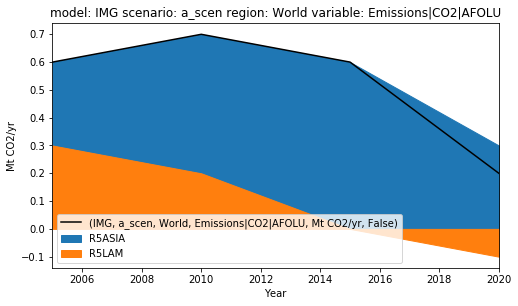

In [12]:
ax = plt.figure(figsize=(8, 4.5)).add_subplot(111)
df.filter(
    variable="Emissions|CO2|AFOLU"
).filter(
    region="World", keep=False
).stack_plot(stack="region", ax=ax)
df.filter(variable="Emissions|CO2|AFOLU", region="World").line_plot(ax=ax, color="black");

Even if there are sectors which are defined only at the world level (e.g. `Emissions|CO2|Fossil|Aviation` in our example), Pyam will find them and include them when calculating the regional total.

In [13]:
df.aggregate_region("Emissions|CO2|Fossil")

model  scenario  unit       year
IMG    a_scen    Mt CO2/yr  2005    4.0
                            2010    4.6
                            2015    4.9
                            2020    4.1
Name: value, dtype: float64

In [14]:
df.filter(variable="Emissions|CO2|Fossil", region="World").timeseries()

,,,,,2005,2010,2015,2020
model,scenario,region,variable,unit,,,,
IMG,a_scen,World,Emissions|CO2|Fossil,Mt CO2/yr,4.0,4.6,4.9,4.1


If we plot the regions vs. the total, in this case we will see a gap. This gap represents the emissions from variables only defined at the world level.

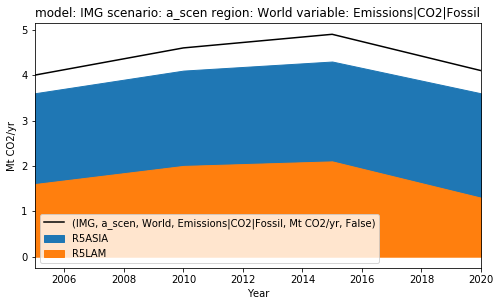

In [15]:
ax = plt.figure(figsize=(8, 4.5)).add_subplot(111)
df.filter(
    variable="Emissions|CO2|Fossil"
).filter(
    region="World", keep=False
).stack_plot(stack="region", ax=ax)
df.filter(variable="Emissions|CO2|Fossil", region="World").line_plot(ax=ax, color="black");

We can verify this by making sure that adding the aviation emissions to the regional emissions does indeed give the aggregate total (a nicer way would be to plot these emissions in the stack above, pull requests which do so are welcome :D).

In [16]:
aviation_emms = df.filter(variable="*Aviation*").timeseries()
aggregate_emms = df.aggregate_region("Emissions|CO2|Fossil")
aggregate_emms_region_only = df.filter(region="World", keep=False).aggregate_region("Emissions|CO2|Fossil")
np.isclose(aggregate_emms.values, aggregate_emms_region_only.values + aviation_emms.values)

array([[ True,  True,  True,  True]])